# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Visulization
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt #Visulization
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import gc

%matplotlib inline


from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("dataset_final.csv")

In [3]:
dataset.head()

,user_id,problem_id,level_type,attempts_range,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating,rank
0,user_1,prob_918,E,1,84,73,10,Bangladesh,120,502.007,499.713,advanced
1,user_1,prob_2990,F,1,84,73,10,Bangladesh,120,502.007,499.713,advanced
2,user_1,prob_1358,D,1,84,73,10,Bangladesh,120,502.007,499.713,advanced
3,user_1,prob_4278,A,1,84,73,10,Bangladesh,120,502.007,499.713,advanced
4,user_1,prob_1868,A,2,84,73,10,Bangladesh,120,502.007,499.713,advanced


# Dataset Summary

In [4]:
dataset.describe()

,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating
count,155295.000000,155295.000000,155295.000000,155295.000000,155295.000000,155295.000000,155295.000000
mean,2.475122,372.235680,336.078695,5.493718,61.064406,407.525560,368.623667
std,1.595811,398.204943,377.378519,19.076626,258.997551,99.670629,112.046565
min,1.000000,1.000000,1.000000,-64.000000,0.000000,303.899000,0.000000
25%,1.000000,118.000000,99.000000,0.000000,7.000000,323.394000,288.131000
50%,2.000000,237.000000,209.000000,0.000000,20.000000,383.028000,356.078000
75%,3.000000,480.000000,428.000000,1.000000,52.000000,468.463000,445.814000
max,6.000000,4570.000000,4476.000000,171.000000,10575.000000,983.085000,911.124000


# Checking null values

In [5]:
dataset.isnull().sum()

user_id             0
problem_id          0
level_type          0
attempts_range      0
submission_count    0
problem_solved      0
contribution        0
country             0
follower_count      0
max_rating          0
rating              0
rank                0
dtype: int64

In [6]:
dataset = dataset.drop(['user_id','problem_id','country'],axis=1)


In [7]:
dataset.head()

,level_type,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank
0,E,1,84,73,10,120,502.007,499.713,advanced
1,F,1,84,73,10,120,502.007,499.713,advanced
2,D,1,84,73,10,120,502.007,499.713,advanced
3,A,1,84,73,10,120,502.007,499.713,advanced
4,A,2,84,73,10,120,502.007,499.713,advanced


In [8]:
enc = LabelEncoder()
enc.fit(dataset['level_type'])
dataset['level_type'] = enc.transform(dataset['level_type'])

In [9]:
enc = LabelEncoder()
enc.fit(dataset['rank'])
dataset['rank'] = enc.transform(dataset['rank'])

In [10]:
dataset.head()

,level_type,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank
0,5,1,84,73,10,120,502.007,499.713,0
1,6,1,84,73,10,120,502.007,499.713,0
2,4,1,84,73,10,120,502.007,499.713,0
3,1,1,84,73,10,120,502.007,499.713,0
4,1,2,84,73,10,120,502.007,499.713,0


In [11]:
temp = dataset['attempts_range'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='attempts_range'
    ),
    yaxis=dict(
        title='Count of attempts_range'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [12]:
temp = dataset['submission_count'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='submission_count'
    ),
    yaxis=dict(
        title='Count of submission_count'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [13]:
temp = dataset['problem_solved'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='problem_solved'
    ),
    yaxis=dict(
        title='Count of problem_solved'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [14]:
temp = dataset['contribution'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='contribution'
    ),
    yaxis=dict(
        title='Count of contribution'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Replacing all the negative values with zero

In [15]:
dataset['contribution']= dataset['contribution'].clip_lower(0)

In [16]:
temp = dataset['contribution'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='contribution'
    ),
    yaxis=dict(
        title='Count of contribution'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [17]:
temp = dataset['rating'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='rating'
    ),
    yaxis=dict(
        title='Count of rating'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [18]:
temp = dataset['rank'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='rank'
    ),
    yaxis=dict(
        title='Count of rank'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [19]:
temp = dataset['level_type'].value_counts().sort_values(ascending=False)

trace = go.Bar(
    x = temp.index,
    y = (temp)
)
data = [trace]
layout = go.Layout(
    title = "",
    xaxis=dict(
        title='level_type'
    ),
    yaxis=dict(
        title='Count of level_type'
        )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Save clean dataset in CSV

In [20]:
dataset.to_csv("CleanDataset.csv")

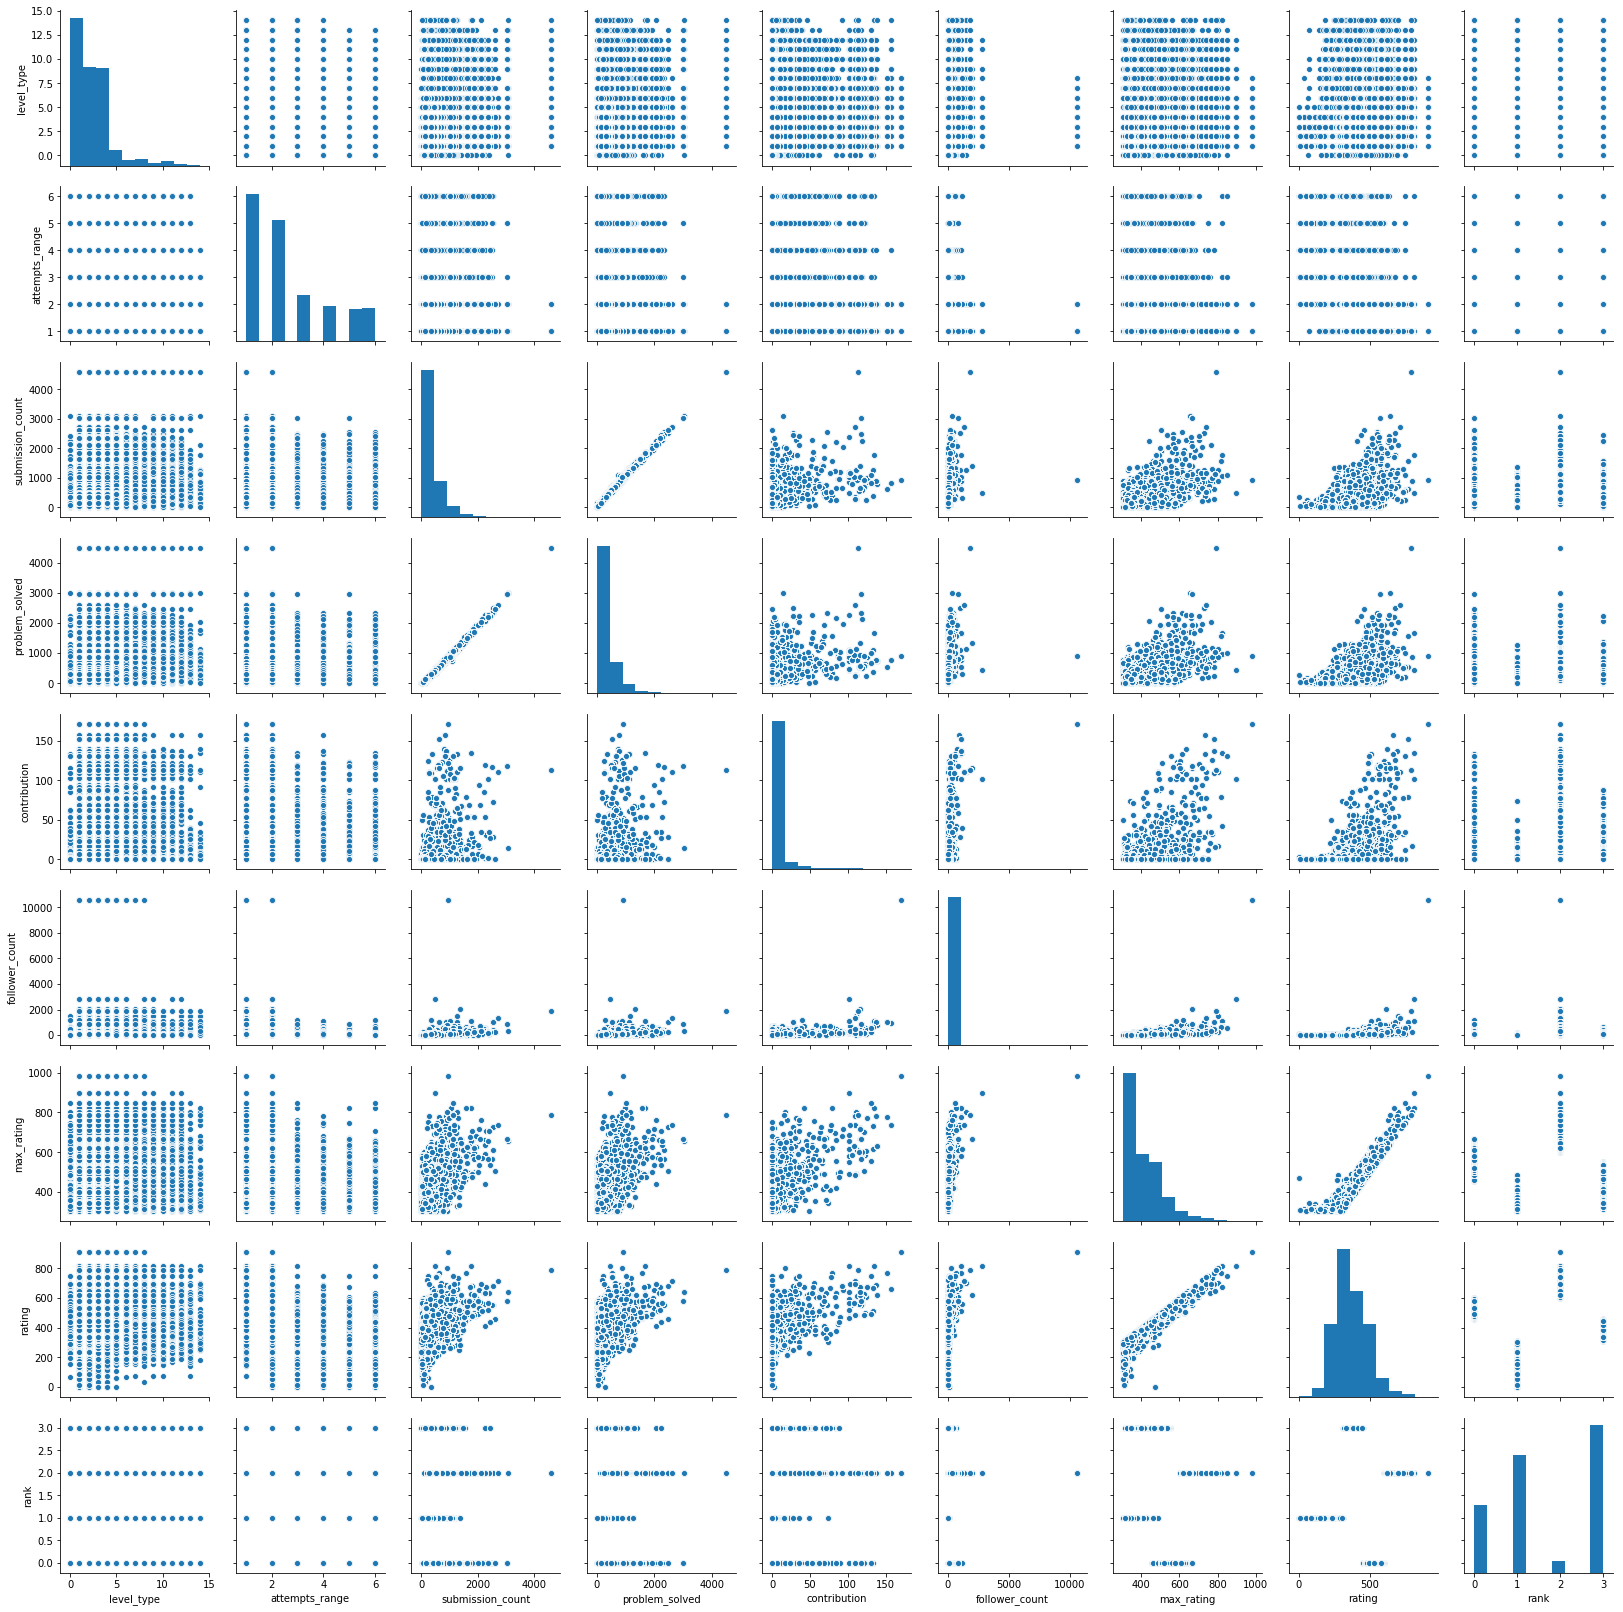

In [21]:
sns.pairplot(dataset)

In [22]:
dataset.corr()

,level_type,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank
level_type,1.000000,-0.118299,0.247137,0.246154,0.154910,0.105787,0.323155,0.331006,-0.040756
attempts_range,-0.118299,1.000000,-0.255634,-0.254370,-0.180278,-0.111819,-0.474133,-0.537495,-0.258369
submission_count,0.247137,-0.255634,1.000000,0.997876,0.450986,0.320270,0.596288,0.546349,-0.098268
problem_solved,0.246154,-0.254370,0.997876,1.000000,0.448609,0.321789,0.596167,0.548583,-0.099975
contribution,0.154910,-0.180278,0.450986,0.448609,1.000000,0.484814,0.548499,0.485399,-0.078745
follower_count,0.105787,-0.111819,0.320270,0.321789,0.484814,1.000000,0.392347,0.342860,-0.037046
max_rating,0.323155,-0.474133,0.596288,0.596167,0.548499,0.392347,1.000000,0.941270,-0.160896
rating,0.331006,-0.537495,0.546349,0.548583,0.485399,0.342860,0.941270,1.000000,-0.075068
rank,-0.040756,-0.258369,-0.098268,-0.099975,-0.078745,-0.037046,-0.160896,-0.075068,1.000000


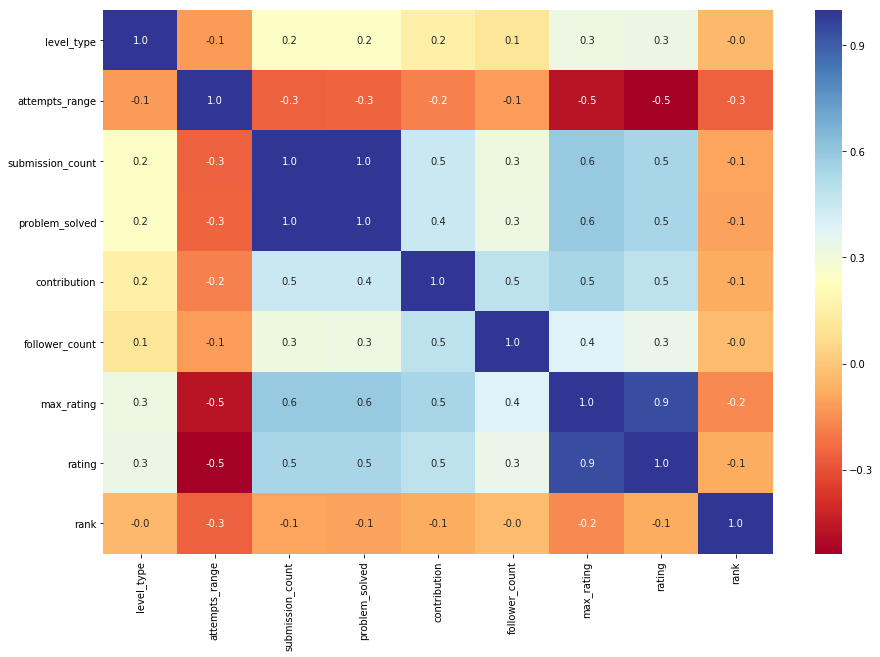

In [23]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(dataset.corr(), annot = True, fmt = ".1f", cmap = "RdYlBu")